<a href="https://colab.research.google.com/github/washmore1/PopulationHealthcareAnalytics/blob/main/DemographicsEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Performing EDA on Pateint Demographics**

In [ ]:
# Setup
!pip install pandas numpy scikit-learn matplotlib seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
%matplotlib inline

In [ ]:
# Load the CSV files into Colab
from google.colab import files
uploaded = files.upload()

Saving patient_demographics.csv to patient_demographics.csv
Saving visits.csv to visits.csv
Saving medications.csv to medications.csv
Saving lab_results.csv to lab_results.csv
Saving clinical_diagnoses.csv to clinical_diagnoses.csv
Saving care_management.csv to care_management.csv


In [ ]:
# Read each csv file into it's own dataframe
df_demo = pd.read_csv('patient_demographics.csv')
df_diag = pd.read_csv('clinical_diagnoses.csv')
df_labs = pd.read_csv('lab_results.csv')
df_meds = pd.read_csv('medications.csv')
df_visits = pd.read_csv('visits.csv')
df_care = pd.read_csv('care_management.csv')

In [ ]:
# verify successful import and preview data
print(f"Demographics data shape: {df_demo.shape}")
print(f"Diagnoses data shape: {df_diag.shape}")
print(f"Labs data shape: {df_labs.shape}")
print(f"Medications data shape: {df_meds.shape}")
print(f"Visits data shape: {df_visits.shape}")
print(f"Care management data shape: {df_care.shape}")

df_demo.head()

Demographics data shape: (10000, 5)
Diagnoses data shape: (12988, 3)
Labs data shape: (40347, 4)
Medications data shape: (19867, 4)
Visits data shape: (64406, 4)
Care management data shape: (4025, 4)


,Patient_ID,Age,Sex,County,Insurance_Type
0,P000001,69,Male,West Matthewborough County,Medicare
1,P000002,32,Male,Gilmoreland County,Medicare
2,P000003,89,Female,Erikmouth County,Private
3,P000004,78,Male,New Kennethland County,Medicare
4,P000005,38,Female,West Johnhaven County,Medicare


**Age Distribution**

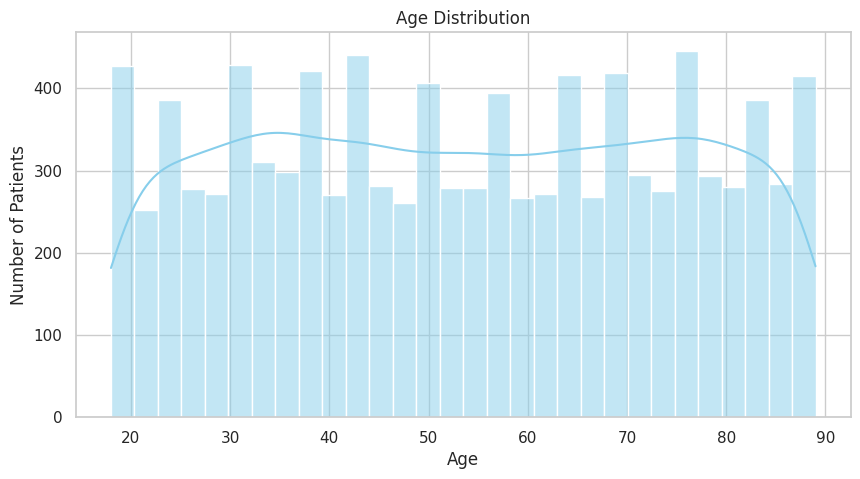

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df_demo['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

**Gender Distribution**

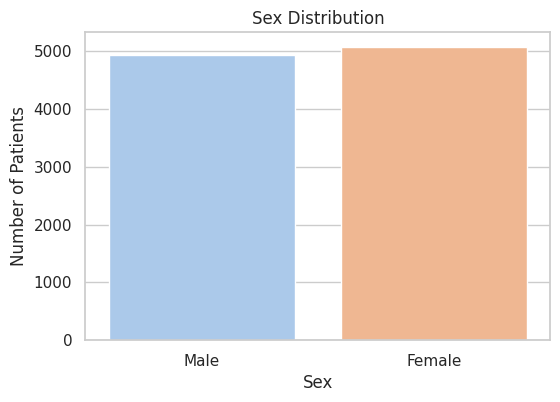

,proportion
Sex,
Female,0.5072
Male,0.4928


In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_demo, x='Sex', hue='Sex', palette='pastel', legend=False)
plt.title('Sex Distribution')
plt.ylabel('Number of Patients')
plt.show()

df_demo['Sex'].value_counts(normalize=True)

**Insurance Type Distribution**

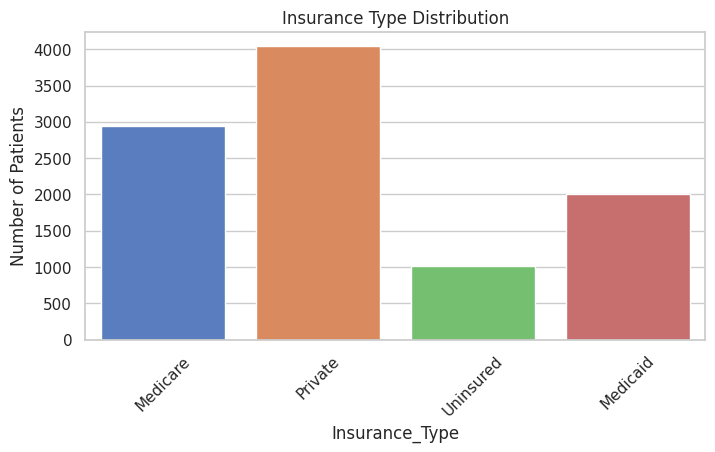

,proportion
Insurance_Type,
Private,0.4038
Medicare,0.2943
Medicaid,0.2006
Uninsured,0.1013


In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df_demo, x='Insurance_Type', hue='Insurance_Type', palette='muted', legend=False)
plt.title('Insurance Type Distribution')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.show()

# Value counts
df_demo['Insurance_Type'].value_counts(normalize=True)

**County Distribution**

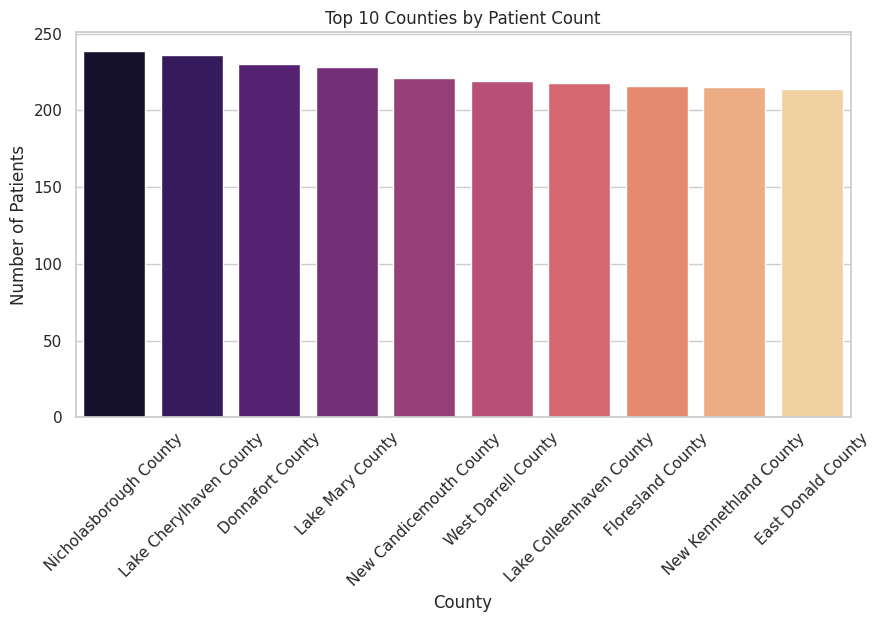

In [ ]:
top_counties = df_demo['County'].value_counts().nlargest(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_counties.index, y=top_counties.values, hue=top_counties.index, palette='magma', legend=False)
plt.title('Top 10 Counties by Patient Count')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.show()

**Insurance Type by Gender**

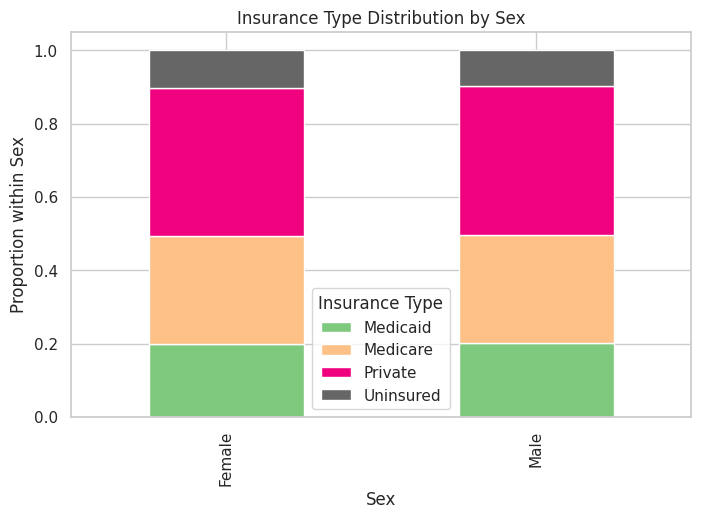

In [ ]:
insurance_by_sex = pd.crosstab(df_demo['Sex'], df_demo['Insurance_Type'], normalize='index')
insurance_by_sex.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Accent')
plt.title('Insurance Type Distribution by Sex')
plt.ylabel('Proportion within Sex')
plt.legend(title='Insurance Type')
plt.show()

**Age by Insurance Type**

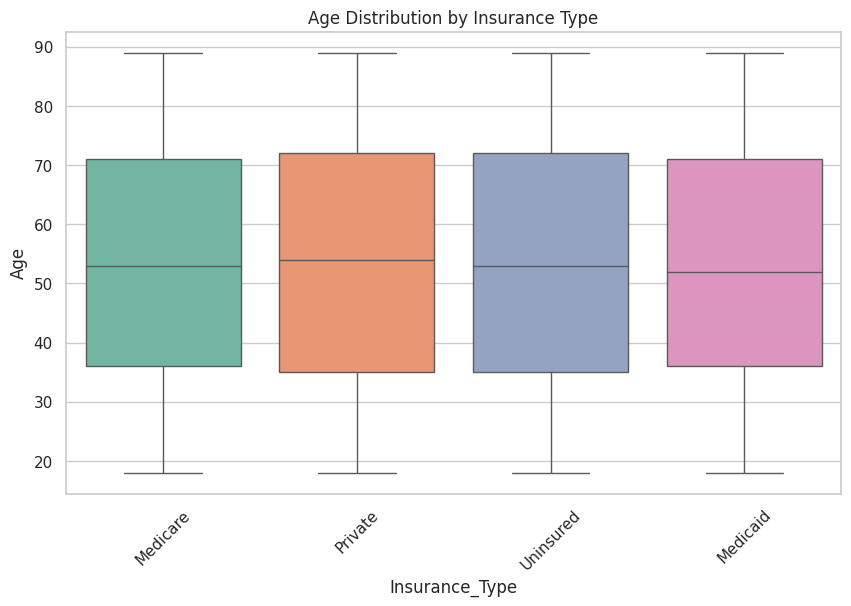

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_demo, x='Insurance_Type', y='Age', hue='Insurance_Type', palette='Set2', legend=False)
plt.title('Age Distribution by Insurance Type')
plt.xticks(rotation=45)
plt.show()